# Moment Estimation of transcriptional parameters

From Bagnall et al. 2020



$$
\begin{align}
   b_m &= \frac{\sigma^2}{\mu} \\\
   \\\
   f_m &= \frac{\mu}{b_m-1} \\\
   \\\
   f_m &= \frac{\mu^2}{\sigma^2-\mu} \\\
   \\\
\end{align}    
$$

- Moments - TSS quantification
    - By timepoint
    - Gene data
    - Enhancer data


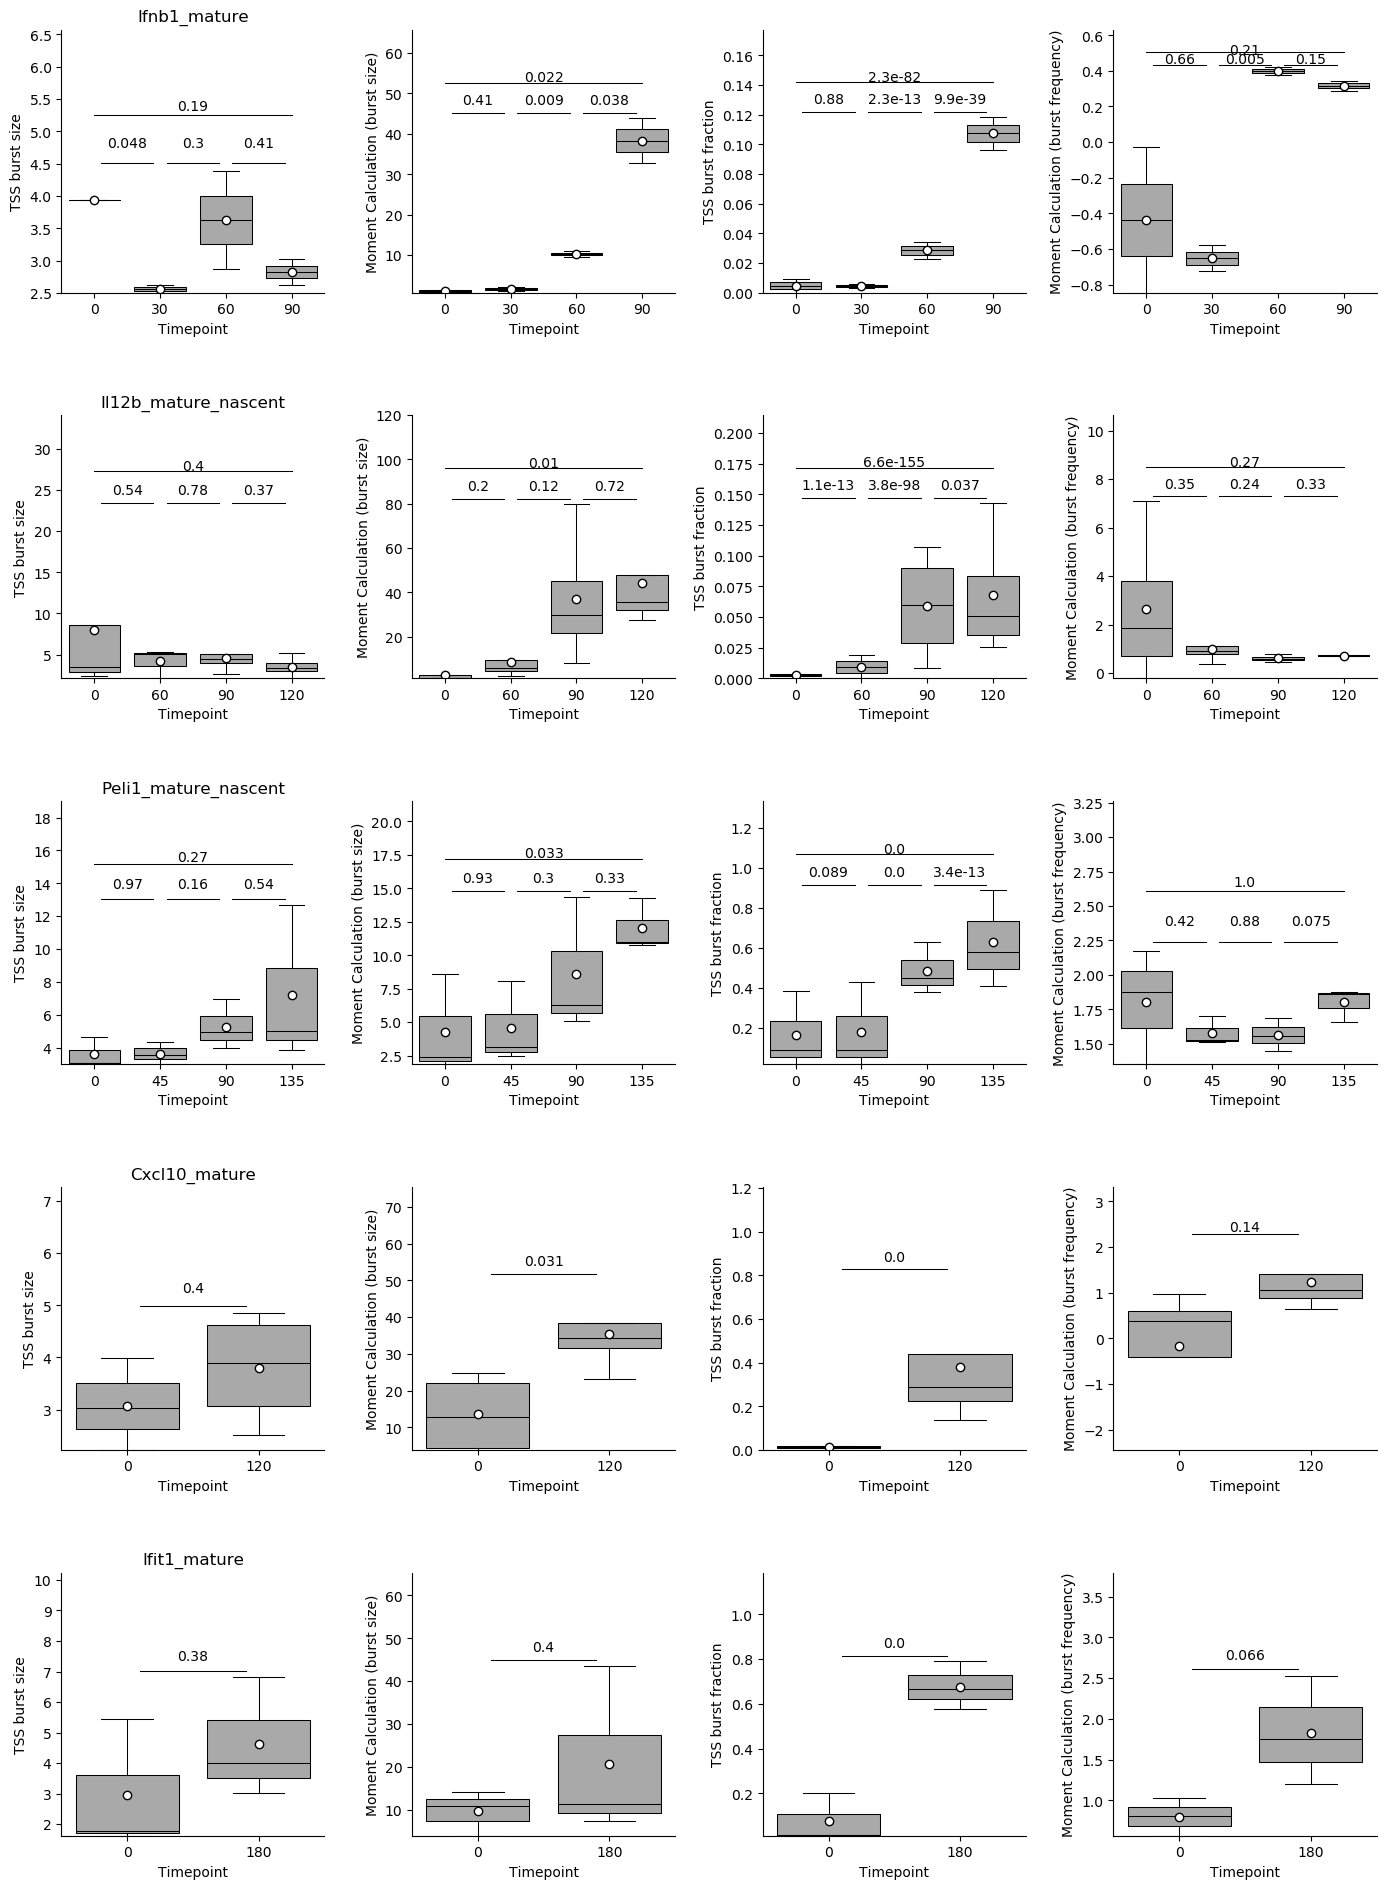

In [90]:

include("momentcalculation.jl")
include("testfunctions.jl")



function f_plot(y, bf_probe, probe; test = anova)
    timepoints = unique(bf_probe[!,:Timepoint])
    ntim = length(timepoints)
    maxy = maximum(bf_probe[!,y][.!isnan.(bf_probe[!,y])])

    Seaborn.boxplot(data = Pandas.DataFrame(bf_probe), x= "Timepoint", y = y, hue = "Genotype", 
             palette = Dict("WT"=>"darkgray", "Rad21KO" => "red"),
        showmeans = true, showfliers = false,
    meanprops = Dict("marker"=>"o", "markeredgecolor"=>"black", "markerfacecolor"=>"white"));pretty_axes2()

       timepoints = string.(sort(parse.(Int, unique(bf_probe[!,:Timepoint]))))
   maxy = maximum(bf_probe[!,y][.!isnan.(bf_probe[!,y])])
    miny = minimum(bf_probe[!,y][.!isnan.(bf_probe[!,y])])

    s = bf_probe[.!isnan.(bf_probe[!,y]), :]
    s[!,y] = [ii for ii in s[!,y]]
    
    for ii in 1:(ntim -1)
        plt.plot([ii-0.9, ii-0.1], [1.03*maxy, 1.03*maxy], c = "black")
        a = s[s[!,:Timepoint].==timepoints[ii],y]
        b = s[s[!,:Timepoint].==timepoints[ii+1],y]
             repa = s[s[!,:Timepoint].==timepoints[ii],:Rep]
        repb = s[s[!,:Timepoint].==timepoints[ii+1],:Rep]
        tag = "NA"
        
        if test == do_mantelhaen
            tag =  round(test(bf_probe, "WT_"*string(timepoints[ii]), "WT_"*string(timepoints[ii+1])), sigdigits = 2)
        else 
            tag =  round(test(a, b, repa, repb), sigdigits = 2)

        end
          
          
        
        plt.annotate("$tag", [mean([ii-0.9, ii-0.1]), 1.1*maxy], ha = "center", va = "center")
    end
    
    if ntim >2
        
        plt.plot([0, ntim-1], [1.2*maxy, 1.2*maxy], c = "black")
        a = s[s[!,:Timepoint].==timepoints[1],y]
        b = s[s[!,:Timepoint].==timepoints[end],y]
        repa = s[s[!,:Timepoint].==timepoints[1],:Rep]
        repb = s[s[!,:Timepoint].==timepoints[end],:Rep]

        tag = "NA"
        if test == do_mantelhaen
            tag =  round(test(bf_probe, "WT_"*string(timepoints[1]), "WT_"*string(timepoints[end])), sigdigits = 2)
        else 
            tag =  round(test(a, b, repa, repb), sigdigits = 2)

        end
          
        
        plt.annotate("$tag", [mean([0, ntim-1]), 1.23*maxy], ha = "center", va = "center")
        
    end
    ylim(miny, 1.5maxy)
    plt.tight_layout(); squareplot(); legend_removal(), line075black()
    
    
end

function TSS_BF(bf_probe, probe)
    f_plot("TSS_BF",bf_probe, probe, test = do_mantelhaen)
    ylabel("TSS burst fraction")
end

function TSS_BS(bf_probe, probe)
    f_plot("TSS_BS",bf_probe, probe)
    ylabel("TSS burst size")
end

function momment_BF(bf_probe, probe)
    f_plot("momment_BF",bf_probe, probe)
    ylabel("Moment Calculation (burst frequency)")
end

function momment_BS(bf_probe, probe)
    f_plot("momment_BS",bf_probe, probe)
    ylabel("Moment Calculation (burst size)")
end


function plot_probe_genedata(probe; c = 4, r = 4, n = 1, folder = "GeneData", lims = nothing)
    probe_df = CSV.read(ENV["Code"]*"/../Code_Paper/CompleteSets/"*folder*"/"*probe*".csv", DataFrames.DataFrame)
    if occursin("Prdm1", probe)
        probe_df = probe_df[probe_df[!,:Timepoint].!=30, :]
        probe_df = probe_df[probe_df[!,:Timepoint].!=90, :]
    end
    #probe_df = probe_df[string.(probe_df[!,:Timepoint]).!="0", :]
    probe_df = probe_df[string.(probe_df[!,:Genotype]).=="WT", :]
    
    timepoints = unique(probe_df[!,:Timepoint])
    ntim = length(timepoints)
    
    bf_probe = bootstrap_mean_std(probe_df, probe, limit = 1)
    subplot(c,r,c*(n-1)+1-(n-1))
    TSS_BS(bf_probe, probe)
    title(probe)
    subplot(c,r,c*(n-1)+2-(n-1))
    momment_BS(bf_probe, probe)
    subplot(c,r,c*(n-1)+3-(n-1))
    TSS_BF(bf_probe, probe)
    subplot(c,r,c*(n-1)+4-(n-1))
    momment_BF(bf_probe, probe)
    bf_probe[!,:Gene] = [probe for ii in 1:nrow(bf_probe)]
    return bf_probe

end
    

figure(figsize = (14, 20))
df = vcat(plot_probe_genedata("Ifnb1_mature"; c = 5, r = 4, n = 1, folder = "CompleteSets"),
plot_probe_genedata("Il12b_mature_nascent"; c = 5, r = 4, n = 2, folder = "CompleteSets", lims = (0, 2)),
plot_probe_genedata("Peli1_mature_nascent"; c = 5, r = 4, n = 3, folder = "CompleteSets"),
plot_probe_genedata("Cxcl10_mature"; c = 5, r = 4, n = 4, folder = "CompleteSets"),
plot_probe_genedata("Ifit1_mature"; c = 5, r = 4, n = 5, folder = "CompleteSets"))
savefigwithtext("bytimepoint.png")

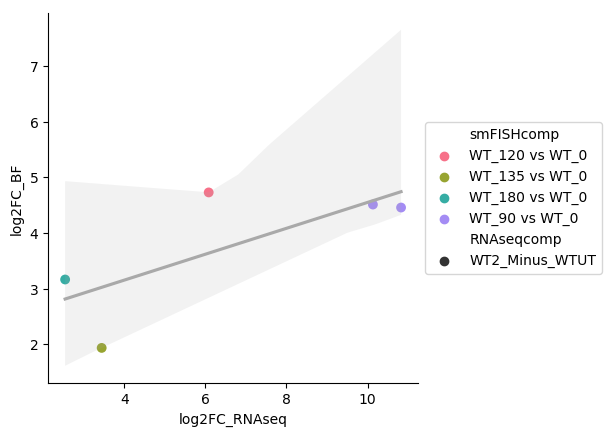

RObject{VecSxp}

	Pearson's product-moment correlation

data:  `#JL`$x1 and `#JL`$y1
t = 1.8941, df = 3, p-value = 0.1545
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4135484  0.9813160
sample estimates:
      cor 
0.7379758 



In [87]:
function dysplay_correlation(tb, x, y; style = "RNAseqcomp", hue = "smFISHcomp")
    bool1 = .! isnan.(tb[!,x]); bool2 = .! isnan.(tb[!,y])
    nonantb = tb[bool1.*bool2, :]
    sort!(nonantb, "smFISHcomp")
    x1 = [ii for ii in nonantb[!,x]]
    y1 = [ii for ii in nonantb[!,y]]
    
    pdt = Pandas.DataFrame(nonantb)

    
    py"""
    import seaborn as sns
    sns.scatterplot(data = $pdt, x= $x, y = $y, hue = $hue, style = $style, palette = "husl", s = 50, linewidth = 0, 
    #hue_order = ["WT_60 vs WT_0","WT_90 vs WT_0","WT_120 vs WT_0","WT_135 vs WT_0","WT_180 vs WT_0"]
    )
    
    sns.regplot(data = $pdt, x= $x, y = $y, scatter = 0, color = "darkgray")

    """
    pretty_axes2()
    legend_out_of_plot()
    squareplot()
    R"cor.test($x1,$y1)"
    
end



dysplay_correlation(tb_sum, "log2FC_RNAseq", "log2FC_BF", style = "RNAseqcomp",)





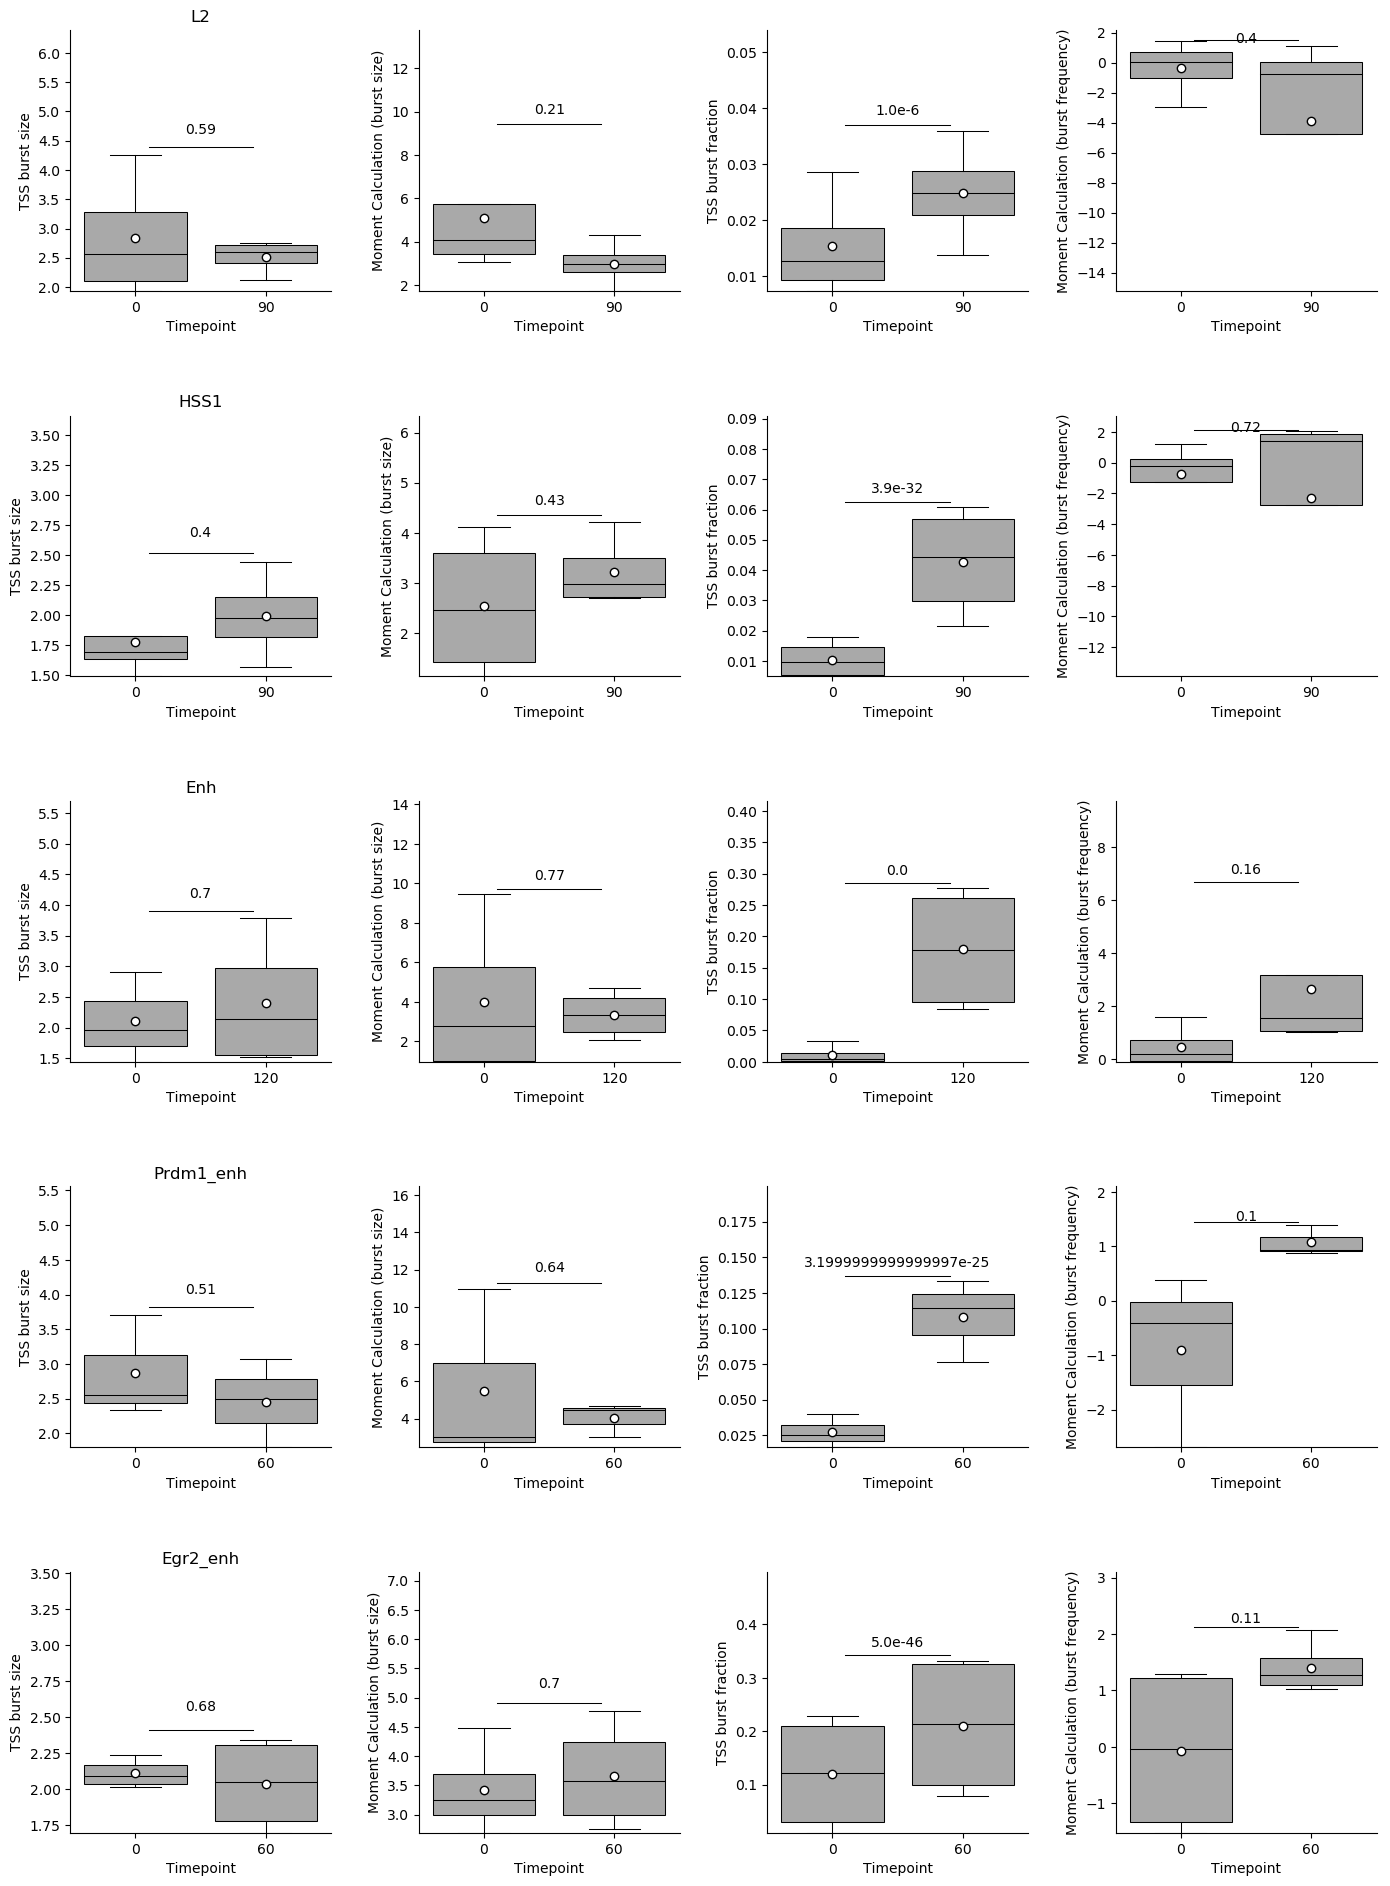

,Sample_Rep,Genotype,Timepoint,Rep,Sample,n_cells,nburst,Gene,mean
,String,SubStri…,SubStri…,SubStri…,String,Any,Any,String,Any
1,WT_0_1,WT,0,1,WT_0,441,181,Egr2_enh,1.32126
2,WT_60_1,WT,60,1,WT_60,1717,1109,Egr2_enh,2.29092
3,WT_60_2,WT,60,2,WT_60,1216,808,Egr2_enh,2.53764
4,WT_0_2,WT,0,2,WT_0,476,217,Egr2_enh,1.63863
5,WT_0_3,WT,0,3,WT_0,965,72,Egr2_enh,0.243999
6,WT_60_3,WT,60,3,WT_60,1050,167,Egr2_enh,0.62086
7,WT_60_4,WT,60,4,WT_60,669,141,Egr2_enh,0.761306
8,WT_0_4,WT,0,4,WT_0,1261,26,Egr2_enh,0.174219


In [72]:
figure(figsize = (14, 20))
plot_probe_genedata("L2"; c = 5, r = 4, n = 1, folder = "GeneData")
plot_probe_genedata("HSS1"; c = 5, r = 4, n = 2, folder = "GeneData")
plot_probe_genedata("Enh"; c = 5, r = 4, n = 3, folder = "GeneData")
plot_probe_genedata("Prdm1_enh"; c = 5, r = 4, n = 4, folder = "GeneData")
plot_probe_genedata("Egr2_enh"; c = 5, r = 4, n = 5, folder = "GeneData")

In [14]:
import Pkg; Pkg.status()

      Status `~/.julia/environments/v1.6/Project.toml`
  [336ed68f] CSV v0.9.11
  [a93c6f00] DataFrames v0.22.7
  [31c24e10] Distributions v0.23.12
  [c2308a5c] FASTX v1.2.0
  [53c48c17] FixedPointNumbers v0.8.4
  [09f84164] HypothesisTests v0.10.2
  [7073ff75] IJulia v1.23.2
  [6a3955dd] ImageFiltering v0.6.21
  [6218d12a] ImageMagick v1.2.2
  [86fae568] ImageView v0.10.13
  [916415d5] Images v0.23.3
  [96684042] InformationMeasures v0.3.1
  [4138dd39] JLD v0.12.3
  [093fc24a] LightGraphs v1.3.5
  [10e44e05] MATLAB v0.8.0
  [f8716d33] MultipleTesting v0.4.1
  [eadc2687] Pandas v1.4.0
  [91a5bcdd] Plots v1.21.2
  [92933f4c] ProgressMeter v1.5.0
  [438e738f] PyCall v1.92.2
  [d330b81b] PyPlot v2.9.0
  [6f49c342] RCall v0.13.10
  [3646fa90] ScikitLearn v0.6.3
  [d2ef9438] Seaborn v0.4.1
  [2913bbd2] StatsBase v0.33.10
